In [11]:
# Module to FFT and extract wavenumbers 0, 1 and 2 using np.fft
# Written by rhwhite rachel.white@cantab.net
import numpy as np
import xarray as xr
import math

# plotting
# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
from cartopy.util import add_cyclic_point
%matplotlib inline


# resize plots
matplotlib.rcParams['figure.figsize']=(20,5)
matplotlib.rcParams.update({'font.size':14})

In [104]:
from scipy.fft import rfft, rfftfreq, irfft


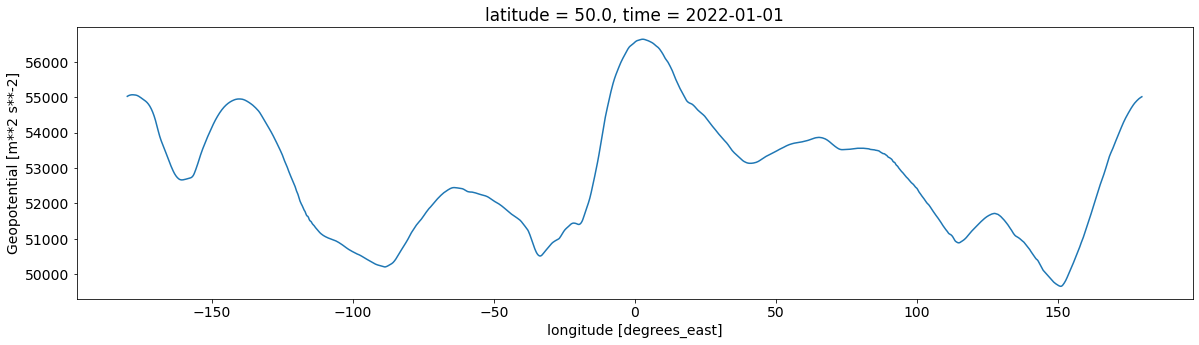

In [73]:
# Read in some test data
z500_in = xr.open_dataset("/data/rwhite/rwhite/Obs/Reanalysis/ERA5/z500_2022_NH_Cuiyi_paper.nc")
# select single latitude
test_z500 = z500_in.z.sel(latitude=50, method='nearest').isel(time=0)

test_z500.plot()
plt.show()

In [96]:
# Fourier transform
yf = rfft(test_z500.values)

# Number of samples, i.e. number of longitude points
N = len(test_z500)
print(N)
# SAMPLE_RATE = degrees longitude/N
SAMPLE_RATE = N # in this case 1440 samples per 'latitude circle' - gives us frequency in wavenumbers

xf = rfftfreq(N, 1 / SAMPLE_RATE)

1440


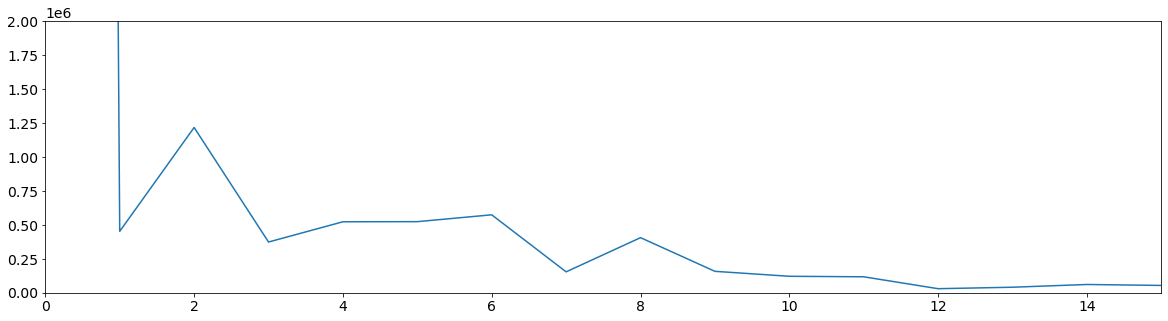

In [100]:
# Look at spectrum to check it's close to what we want
#yf[0] = 0
plt.plot(xf, np.abs(yf))
plt.xlim(0,15)
plt.ylim(0,2e6)
# Set constant term to 0:

plt.show()

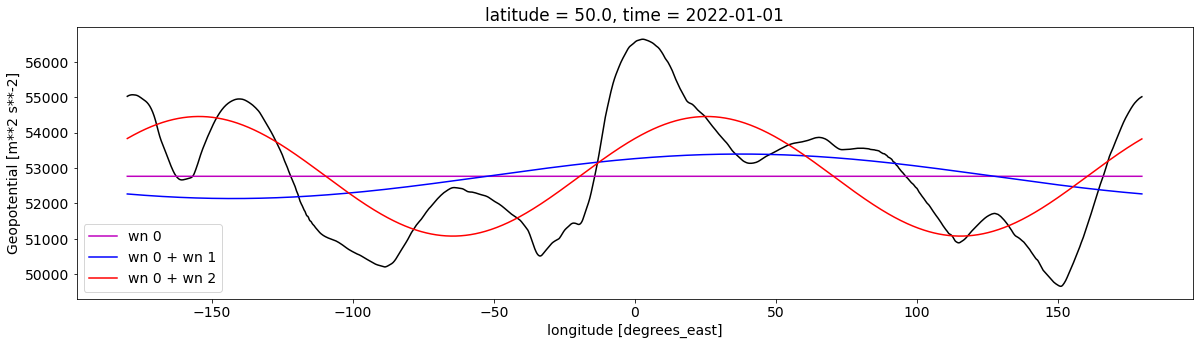

In [126]:
# Now select only certain frequencies to recreate the signal:
FFT0 = yf.copy()
FFT0[1:len(yf)] = 0 # Only keep yf[0]
FFT1_0 = yf.copy()
FFT1_0[2:len(yf)] = 0 # Only keep yf[0] and yf[1]
FFT2_0 = yf.copy()
FFT2_0[1] = 0 # Only keep yf[0] and yf[2]
FFT2_0[3:len(yf)] = 0 # Only keep yf[0] and yf[2]

# Put it back together:
test_z500.plot(color='k')
plt.plot(test_z500.longitude,np.abs(irfft(FFT0)),label='wn 0',color='m')
plt.plot(test_z500.longitude,np.abs(irfft(FFT1_0)),label='wn 0 + wn 1',color='b')
plt.plot(test_z500.longitude,np.abs(irfft(FFT2_0)),label='wn 0 + wn 2',color='r')
plt.legend()
plt.show()

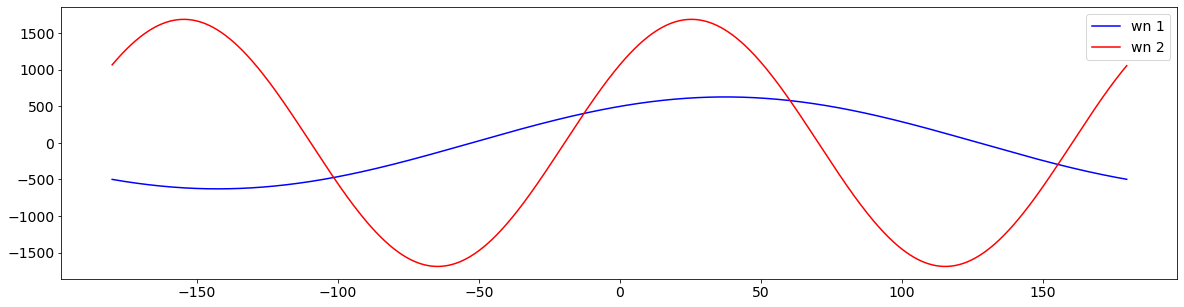

In [127]:
# Now select only wavenumbers 1 and 2:
Z_wn1 = np.abs(irfft(FFT1_0)) - np.abs(irfft(FFT0))
Z_wn2 = np.abs(irfft(FFT2_0)) - np.abs(irfft(FFT0))

# Plot:
plt.plot(test_z500.longitude,Z_wn1,label='wn 1',color='b')
plt.plot(test_z500.longitude,Z_wn2,label='wn 2',color='r')
plt.legend()

plt.show()